In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


## Step 1: Importing Required Libraries

We start by importing all the necessary Python libraries for data analysis and visualization.  
- `pandas` for data manipulation  
- `matplotlib` & `seaborn` for creating visualizations  
- `warnings` to suppress unnecessary output


In [6]:
# Load the clean dataset
df = pd.read_csv("Unemployment_Rate_upto_11_2020.csv")

# Preview first few rows
df.head()


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


## Step 2: Loading the Dataset

We're using the `Unemployment_Rate_upto_11_2020.csv` dataset which contains monthly unemployment-related data for various Indian states.  
Let's take a quick look at the first few rows to understand the structure.


In [7]:
# Dataset Info
df.info()

# Column names
print("Column Names:", df.columns.tolist())

# Basic summary
df.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB
Column Names: ['Region', ' Date', ' Frequency', ' Es

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


## Step 3: Exploring and Understanding the Data

We inspect the data types, column names, and statistical summary to understand the shape and quality of the dataset.  
This helps us decide what preprocessing steps are needed.


In [8]:
# Clean columns
df.columns = df.columns.str.strip().str.replace(" ", "_")

# Convert Date to datetime
df["Date"] = pd.to_datetime(df["Date"])

# Double-check
df.head()


,Region,Date,Frequency,Estimated_Unemployment_Rate_(%),Estimated_Employed,Estimated_Labour_Participation_Rate_(%),Region.1,longitude,latitude
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,15.9129,79.74


## Step 4: Cleaning Column Names and Dates

To make the dataset easier to work with, we:
- Standardize column names using `.str.strip()` and `.str.replace()`
- Convert the 'Date' column to datetime format


In [10]:
print(df.columns.tolist())


['Region', 'Date', 'Frequency', 'Estimated_Unemployment_Rate_(%)', 'Estimated_Employed', 'Estimated_Labour_Participation_Rate_(%)', 'Region.1', 'longitude', 'latitude']


['Region', 'Date', 'Frequency', 'Estimated_Unemployment_Rate_(%)', 'Estimated_Employed', 'Estimated_Labour_Participation_Rate_(%)', 'Region.1', 'longitude', 'latitude']


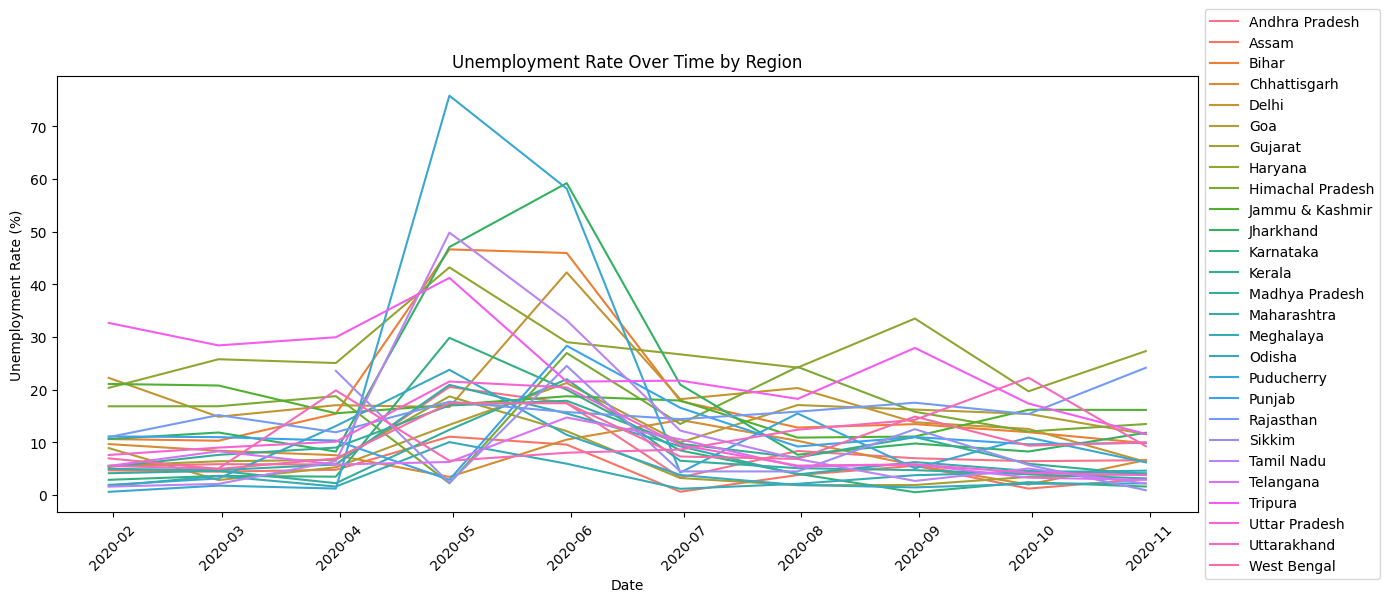

In [11]:
# Check column names before plotting
print(df.columns.tolist())

# Corrected column name (with trailing underscore)
plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x="Date", y="Estimated_Unemployment_Rate_(%)", hue="Region")
plt.title("Unemployment Rate Over Time by Region")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.xticks(rotation=45)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()


## Step 5: Unemployment Trend Over Time by Region

We use a line plot to visualize the unemployment rate over time across different regions of India.  
This helps us identify trends, spikes, and drops, especially around the COVID-19 period.


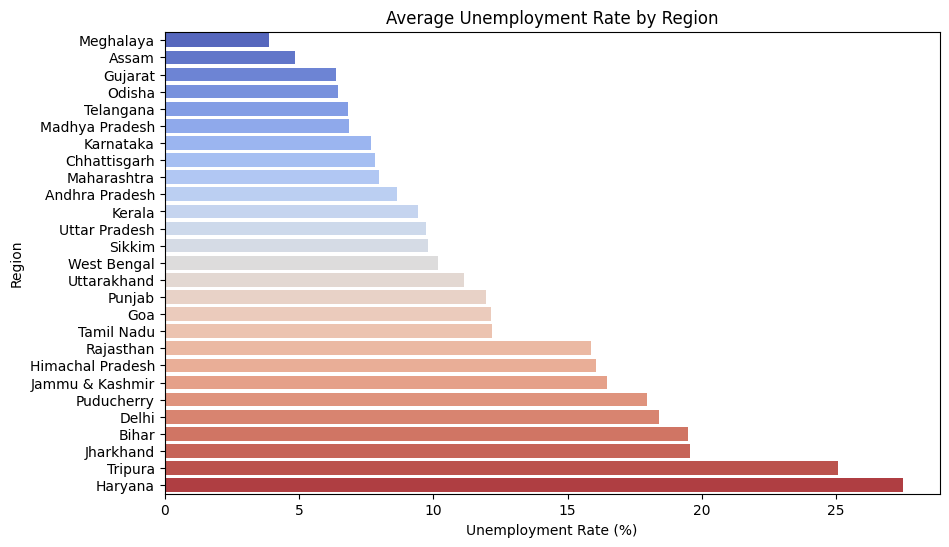

In [12]:
region_avg = df.groupby('Region')["Estimated_Unemployment_Rate_(%)"].mean().sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=region_avg.values, y=region_avg.index, palette="coolwarm")
plt.title("Average Unemployment Rate by Region")
plt.xlabel("Unemployment Rate (%)")
plt.ylabel("Region")
plt.show()


## Step 6: Average Unemployment Rate by Region

This bar chart shows the average unemployment rate per region.  
It helps us identify which regions faced higher unemployment over the observed period.


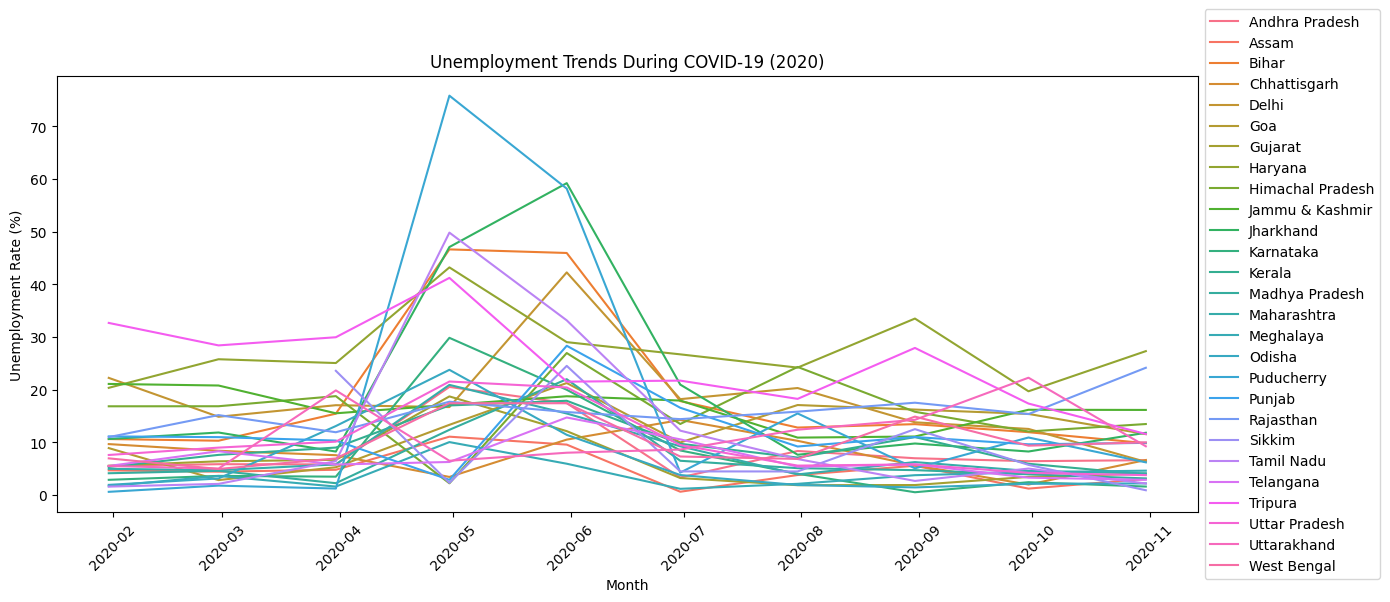

In [13]:
# Filter for 2020
df_2020 = df[df['Date'].dt.year == 2020]

plt.figure(figsize=(14, 6))
sns.lineplot(data=df_2020, x="Date", y="Estimated_Unemployment_Rate_(%)", hue="Region")
plt.title("Unemployment Trends During COVID-19 (2020)")
plt.xlabel("Month")
plt.ylabel("Unemployment Rate (%)")
plt.xticks(rotation=45)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()


## Step 7: Unemployment During COVID-19 (2020)

We zoom in on the year 2020 to investigate how unemployment rates changed due to the COVID-19 pandemic.  
Notice the sharp spike during the April–June 2020 lockdown phase.


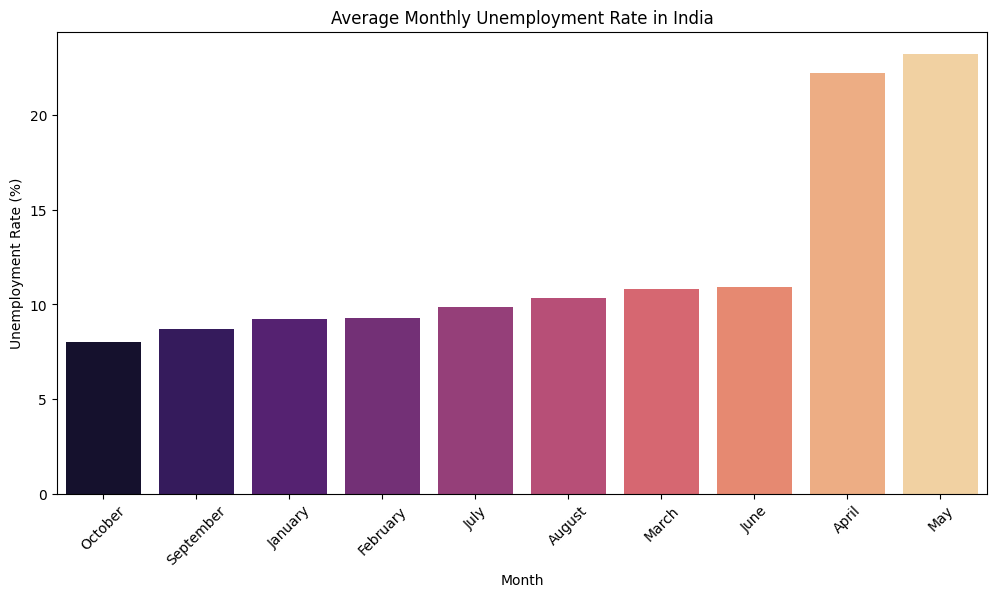

In [14]:
# Add Month column
df["Month"] = df["Date"].dt.month_name()

monthly_avg = df.groupby("Month")["Estimated_Unemployment_Rate_(%)"].mean().sort_values()

plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_avg.index, y=monthly_avg.values, palette="magma")
plt.title("Average Monthly Unemployment Rate in India")
plt.xticks(rotation=45)
plt.ylabel("Unemployment Rate (%)")
plt.show()


## Step 8: Monthly Seasonality Trends

We calculate average unemployment by month to see if there are any recurring patterns or seasonal effects throughout the year.


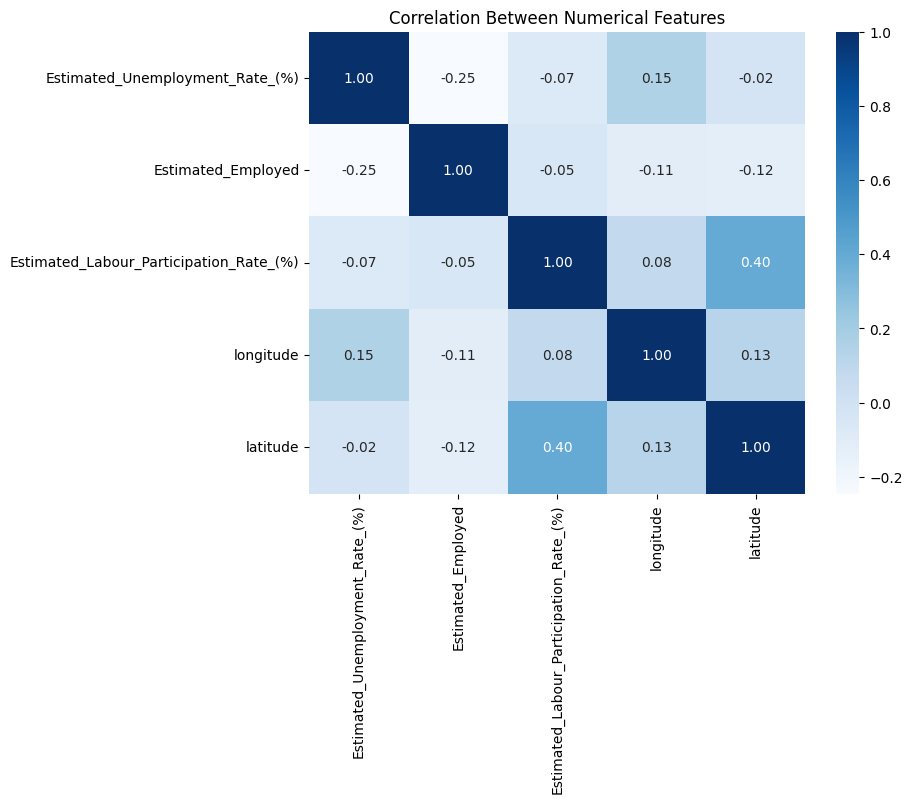

In [16]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=["float64", "int64"])

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlation Between Numerical Features")
plt.show()


## Step 9: Correlation Analysis

We use a heatmap to visualize the relationship between numerical features in the dataset.  
This helps us identify how variables like labour participation rate and employment might influence unemployment.


## 📌 Summary of Key Insights

- **COVID-19 led to a noticeable spike** in unemployment across almost all regions, especially during April–June 2020.
- **Tripura and Haryana** had the highest average unemployment rates overall.
- **Monthly analysis** shows mild seasonality, with slight increases in mid-year.
- **Correlation analysis** suggests some relationship between labour participation and unemployment rates.

- This type of analysis can help policymakers target regions or periods with strategic employment programs.

---

🎯 Project Completed by "Taimoor Ul Hassan" as part of Code Alpha’s Data Science Internship.  
📂 Dataset: CMIE (via Kaggle)  
🧠 Tools Used: Python, Pandas, Matplotlib, Seaborn
